In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [2]:
import datetime
data = cv2.VideoCapture('Testvideo (online-video-cutter.com).mp4')
frames = data.get(cv2.CAP_PROP_FRAME_COUNT)
fps = data.get(cv2.CAP_PROP_FPS)
seconds = frames/fps
print(seconds)

25.050505050505052


In [3]:
cap = cv2.VideoCapture('Testvideo (online-video-cutter.com).mp4')
tracker = cv2.TrackerMIL_create()
ret,frame = cap.read()
roi = cv2.selectROI(frame,False)
ret = tracker.init(frame,roi)
(x,y,w,h) = tuple(map(int,roi))
location = []
track_time = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret==True:
        frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        #blur = cv2.blur(frame,(3,3))
        frame_gray = frame_gray[y:y+h,x:x+w]
#         frame_gray = np.asarray(plot_at_k(30,frame_gray),dtype='uint8')
    #    frame_gray = cv2.blur(frame_gray,(2,2))
        edge = cv2.Canny(frame_gray,127,255)
        edge_axis = edge[50]
        for i in range(1,len(edge_axis)-2):
            if edge_axis[i+1] == 255 and edge_axis[i-1] == 255 and edge_axis[i] == 0:
                location.append(i)
                track_time.append(time.time())
        time.sleep(1/120)
        cv2.imshow('frame_gray',frame_gray)
        cv2.imshow('frame',frame)
        cv2.imshow('edge',edge)
        if cv2.waitKey(1) & 0XFF == 27  or (cap.isOpened()==False):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()
final_location = []
length = len(location)
for i in range(length-1):
    final_location.append(location[i+1]-location[0])
final_time = []
for i in range(length-1):
    final_time.append(track_time[i+1]-track_time[0])

Text(0.5, 0, 'Time in seconds')

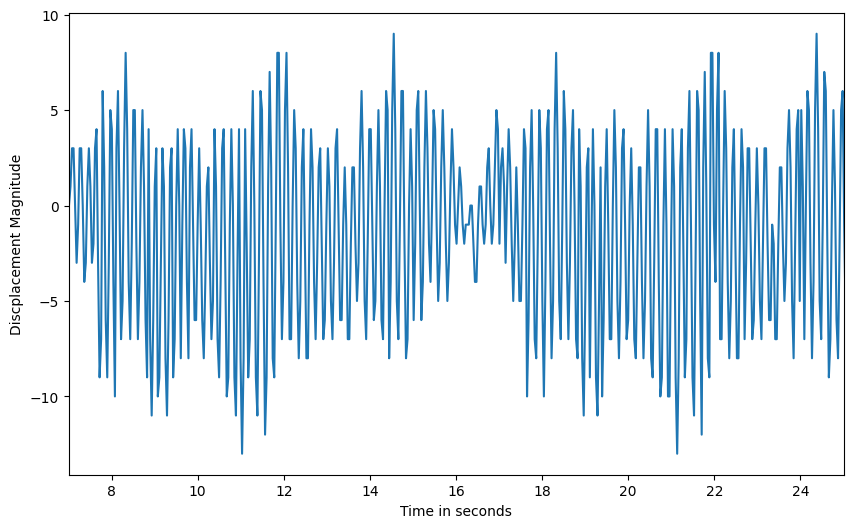

In [4]:
plt.figure(figsize=(10,6))

plt.plot(list(np.linspace(0,seconds,len(final_location))),final_location)
plt.xlim(7,25)
plt.ylabel('Discplacement Magnitude')
plt.xlabel('Time in seconds')

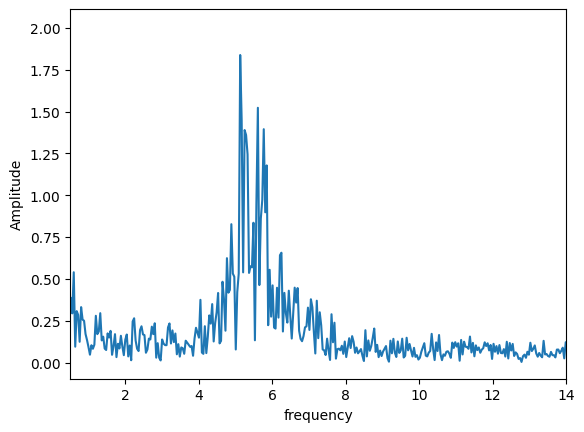

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = len(final_location)
# sample spacing
T = seconds/N
x = np.linspace(0.0, seconds, N)
y = final_location
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.xlim(.5,14)
plt.ylabel('Amplitude')
plt.xlabel('frequency')
plt.show()